In [1]:
import torch
import matplotlib.pyplot as plt

In [10]:
import torch
from torch.utils.data import Dataset
import pandas as pd
import numpy as np
from datetime import datetime


class SineDataset(Dataset):
    """Load an NBA dataset."""

    def __init__(self, X, Y):
        """
        Args:
            file_location (string): Location of the file
            normalise (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.X = X
        self.Y = Y



    def __len__(self):
        return self.X.shape[0]


    def __getitem__(self, idx):
        output = [torch.as_tensor([self.X[idx]]).float(), torch.as_tensor([self.Y[idx]]).float()]

#         x = np.zeros(len(self.X))
#         x[idx] = 1
#         output = [torch.as_tensor(x).float(), torch.as_tensor([self.Y[idx]])]

        return output

# Just add noise to the output 

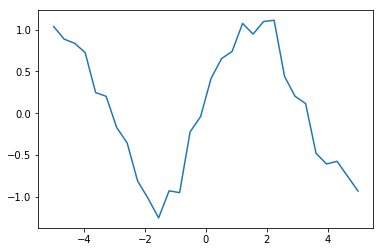

In [16]:
sample_points = 30
X = np.linspace(-5, 5, sample_points)
Y = np.sin(X) + np.random.normal(0, 0.15, [sample_points])
plt.plot(X, Y)
plt.show()

# Just train. Generalization will come later ...

In [23]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        inp_dim = 1 #30
        out_dim = 1
        width = 36
        num_layers = 6
        self.fc1 = nn.Linear(inp_dim, width)
        self.layers = [nn.Linear(width, width) for _ in range(num_layers)]
        self.fc2 = nn.Linear(width, out_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
#         x = self.fc1(x)

        for i in range(len(self.layers)):
            x = F.relu(self.layers[i](x))
        x = self.fc2(x)
        return x


net = Net()

In [24]:
import torch.optim as optim

criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=1e-1)

args = {}
args["epochs"] = 1000
args["batch_size"] = 1

In [25]:
# Create datasets and dataloaders
train_data = SineDataset(X, Y)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=args["batch_size"],
                                           shuffle=True, num_workers=4, drop_last=True)

In [29]:
for epoch in range(args["epochs"]):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
    if epoch % 100 == 0: 
        print("Epoch {}".format(epoch))

        print(running_loss)

print('Finished Training')

Epoch 0
0.06560905187150468
Epoch 100
0.06249746791151267
Epoch 200
0.0599643867640367
Epoch 300
0.0552048730865522
Epoch 400
0.05543848985109889


KeyboardInterrupt: 

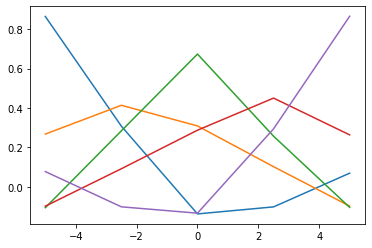

In [494]:
# inp = torch.as_tensor(np.eye(len(X))).float()
# print(inp)
# outputs = net(inp).detach().numpy()

outputs = net(torch.as_tensor(X.reshape(len(X), 1)).float()).detach().numpy()

plt.plot(X, outputs)
# plt.plot(X, Y)

plt.show()

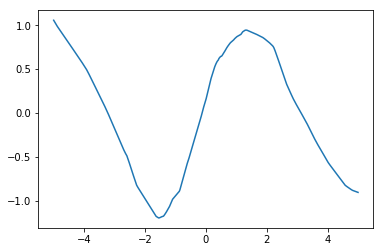

In [21]:
X = np.linspace(-5, 5, 500)
Y = net(torch.Tensor(X).view(len(X), 1)).detach().numpy()

plt.plot(X, Y)
plt.show()